In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import yaml
import sys

In [2]:
def open_yaml_files() -> list[list[dict]]:
    """
    Opens and loads yaml files to a list

    Returns
    -------
        list of list of dictionaries
    """

    with open("airlines.yaml", "r") as airlines_yaml:
        airlines_list = yaml.safe_load(airlines_yaml)['airlines']

    with open("airports.yaml", "r") as airports_yaml:
        airports_list = yaml.safe_load(airports_yaml)['airports']

    with open("routes.yaml", "r") as routes_yaml:
        routes_list = yaml.safe_load(routes_yaml)['routes']

    return [airlines_list, airports_list, routes_list]
    
data_lists = open_yaml_files()

In [3]:
def create_data_frames(data_lists):
    """

    Parameters
    ----------
    data_frames

    Returns
    -------

    """
    airline_df = pd.DataFrame(data_lists[0])
    display(airline_df)
    
    airport_df = pd.DataFrame(data_lists[1])
    display(airport_df)

    route_df = pd.DataFrame(data_lists[2])
    display(route_df)
    
    return [airline_df, airport_df, route_df]


data_frames_list = create_data_frames(data_lists)

,airline_id,airline_name,airline_icao_unique_code,airline_country
0,2,135 Airways,GNL,United States
1,3,1Time Airline,RNX,South Africa
2,4,2 Sqn No 1 Elementary Flying Training School,WYT,United Kingdom
3,5,213 Flight Unit,TFU,Russia
4,6,223 Flight Unit State Airline,CHD,Russia
...,...,...,...,...
6042,19828,Vuela Cuba,6CC,Cuba
6043,19830,All Australia,8K8,Australia
6044,19831,Fly Europa,RWW,Spain
6045,19834,FlyPortugal,FPT,Portugal


,airport_id,airport_name,airport_city,airport_country,airport_icao_unique_code,airport_altitude
0,2,Madang,Madang,Papua New Guinea,AYMD,20.0
1,3,Mount Hagen,Mount Hagen,Papua New Guinea,AYMH,5388.0
2,4,Nadzab,Nadzab,Papua New Guinea,AYNZ,239.0
3,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,AYPY,146.0
4,6,Wewak Intl,Wewak,Papua New Guinea,AYWK,19.0
...,...,...,...,...,...,...
8101,9537,Mansons Landing Water Aerodrome,Mansons Landing,Canada,\N,0.0
8102,9538,Port McNeill Airport,Port McNeill,Canada,\N,225.0
8103,9539,Sullivan Bay Water Aerodrome,Sullivan Bay,Canada,\N,0.0
8104,9540,Deer Harbor Seaplane,Deer Harbor,United States,\N,0.0


,route_airline_id,route_from_aiport_id,route_to_airport_id
0,2009,193,1382
1,137,1800,3682
2,1767,3379,4308
3,1790,2548,2560
4,2439,3998,1216
...,...,...,...
6749,3661,1613,4091
6750,2009,3752,3858
6751,214,1613,1229
6752,4547,3566,3877


In [4]:
def bar_chart(bar_df, title: str, x_axis_label: str, y_axis_label: str, pdf_filename: str):
    
    x_axis = bar_df[bar_df.columns[0]]
    
    y_axis = bar_df[bar_df.columns[1]]
    
    bar_chart = plt.bar(x_axis, y_axis, color="#be4d25", edgecolor = "#85361a", linewidth = 1.2, label = "Title")
    
    plt.xlabel(x_axis_label) 
    plt.ylabel(y_axis_label) 
    plt.xticks(rotation=55, ha='right', fontsize = 7)
    
  
    plt.title(title)
    
    bar_chart.savefig(pdf_filename, bbox_inches='tight')
    



In [5]:
def pie_chart(pie_df, title: str, x_axis_label: str, y_axis_label: str, pdf_filename: str):
    
    x_axis = pie_df[pie_df.columns[0]]
    y_axis = pie_df[pie_df.columns[1]]
    
    pie_chart = plt.pie(y_axis,labels = x_axis,wedgeprops={'linewidth': 0.25, 'edgecolor': 'white'}, textprops={'fontsize': 7})
    
    plt.title(title)

    pie_chart.savefig(pdf_filename)
    
    

In [35]:
def q1_csv(data_frames_list):
    q1_df = pd.merge(data_frames_list[2],data_frames_list[1].reset_index(), left_on='route_to_airport_id', right_on='airport_id', how='left')
    q1_df = pd.merge(q1_df,data_frames_list[0].reset_index(), left_on='route_airline_id', right_on='airline_id', how='left')
    
    canada_df = q1_df['airport_country'] == 'Canada'
    q1_df = q1_df[canada_df]
    q1_df["subject"] = q1_df['airline_name'].astype(str) +" ("+ q1_df['airline_icao_unique_code']+")"
    q1_df = q1_df.groupby('subject').route_airline_id.count().reset_index(name='statistic')
    q1_df = q1_df.sort_values(by=['statistic'], ascending=False).head(15)

    q1_df.to_csv("q1.csv", index=False)
    
    pie_chart(q1_df,"Top 15 Airlines by Routes to Canada", "Airlines", "Number of Routes",arguments_list[4])
    bar_chart(q1_df,"Top 15 Airlines by Number or Routes to Canada", "Airlines", "Number of Routes")
   
    
    return q1_df

q1_df = q1_csv(data_frames_list)



display(q1_df)

NameError: name 'arguments_list' is not defined

In [34]:
def q2_csv(data_frames_list):
    q2_df = pd.merge(data_frames_list[2],data_frames_list[1].reset_index(), left_on='route_to_airport_id', right_on='airport_id', how='left')
    
    q2_df = q2_df.groupby('airport_country').route_airline_id.count().reset_index(name='statistic')
    q2_df.airport_country = q2_df.airport_country.str.strip()
    q2_df = q2_df.sort_values(by=['airport_country']).head(30)
    q2_df = q2_df.rename(columns={'airport_country':'subject'})
    q2_df.to_csv("q2.csv", index=False)

    #bar = bar_chart(q2_df,"Top 30 Countries with Least Appearances as Destination Country", "Country", "Number of Routes")
    #pie = pie_chart(q1_df,"Top 15 Airlines by Routes to Canada", "Airlines", "Number of Routes")
    
    return q2_df

q2_df = q2_csv(data_frames_list)

display(q2_df)

,subject,statistic
1,Afghanistan,1
2,Albania,6
3,Algeria,26
4,American Samoa,1
5,Angola,4
6,Antigua and Barbuda,5
7,Argentina,30
8,Armenia,3
9,Aruba,7
10,Australia,90


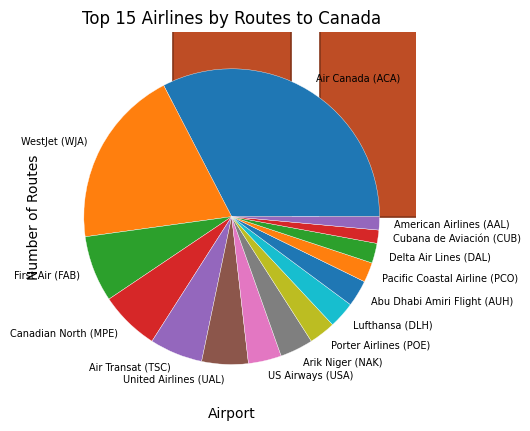

,subject,statistic
526,"Hartsfield Jackson Atlanta Intl (KATL), Atlant...",97
200,"Capital Intl (ZBAA), Beijing, China",69
248,"Chicago Ohare Intl (KORD), Chicago, United States",65
418,"Frankfurt Main (EDDF), Frankfurt, Germany",56
533,"Heathrow (EGLL), London, United Kingdom",56
234,"Charles De Gaulle (LFPG), Paris, France",56
295,"Dallas Fort Worth Intl (KDFW), Dallas-Fort Wor...",47
775,"Los Angeles Intl (KLAX), Los Angeles, United S...",46
1183,"Schiphol (EHAM), Amsterdam, Netherlands",45
104,"Barcelona (LEBL), Barcelona, Spain",42


In [9]:
def q3_csv(data_frames_list):
    q3_df = pd.merge(data_frames_list[2],data_frames_list[1].reset_index(), left_on='route_to_airport_id', right_on='airport_id', how='left')
    
    q3_df["subject"] = q3_df['airport_name'].astype(str) +" ("+ q3_df['airport_icao_unique_code']+"), "+q3_df['airport_city']+", "+q3_df['airport_country']
    
    q3_df = q3_df.groupby('subject').route_airline_id.count().reset_index(name='statistic')
    q3_df = q3_df.sort_values(by=['statistic'],ascending=False).head(10)
    
    q3_df.to_csv("q3.csv", index=False)
    
    bar = bar_chart(q3_df,"Top 10 Destination Airports", "Airport", "Number of Routes")
    pie = pie_chart(q1_df,"Top 15 Airlines by Routes to Canada", "Airlines", "Number of Routes")
    
    return q3_df

q3_df = q3_csv(data_frames_list)

display(q3_df)

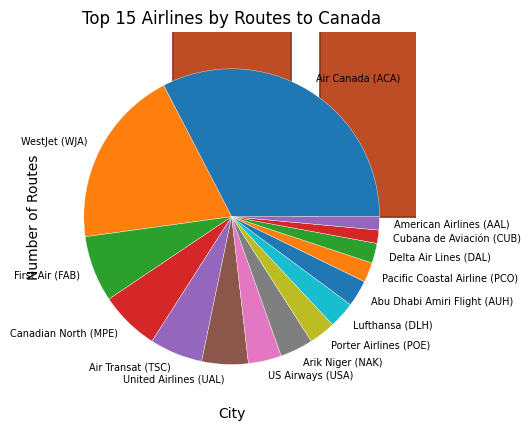

,subject,statistic
718,"London, United Kingdom",136
71,"Atlanta, United States",97
968,"Paris, France",82
258,"Chicago, United States",80
119,"Beijing, China",77
889,"New York, United States",61
838,"Moscow, Russia",56
403,"Frankfurt, Germany",56
555,"Istanbul, Turkey",55
314,"Dallas-Fort Worth, United States",47


In [16]:
def q4_csv(data_frames_list):
    q4_df = pd.merge(data_frames_list[2],data_frames_list[1].reset_index(), left_on='route_to_airport_id', right_on='airport_id', how='left')
    
    q4_df["subject"] = q4_df['airport_city']+", "+q4_df['airport_country']
    
    q4_df = q4_df.groupby('subject').route_airline_id.count().reset_index(name='statistic')
    q4_df = q4_df.sort_values(by=['statistic'],ascending=False).head(15)
    
    q4_df.to_csv("q3.csv", index=False)
    
    bar = bar_chart(q4_df,"Top 10 Destination Cities", "City", "Number of Routes")
    pie = pie_chart(q1_df,"Top 15 Airlines by Routes to Canada", "Airlines", "Number of Routes")
    
    return q4_df

q4_df = q4_csv(data_frames_list)

display(q4_df)

In [37]:
def q5_csv(data_frames_list):
    q5_df = pd.merge(data_frames_list[2],data_frames_list[1].reset_index(), left_on='route_to_airport_id', right_on='airport_id', how='left')
    
    q5_df = q5_df.rename(columns={'airport_icao_unique_code':'to_airport_code'})
    airports_df = data_frames_list[1]
    
    airports_df = airports_df.drop(columns=['airport_name','airport_city'])
    
    q5_df = pd.merge(q5_df,airports_df.reset_index(), left_on='route_from_aiport_id', right_on='airport_id', how='left')
    q5_df = q5_df.rename(columns={'airport_icao_unique_code':'from_airport_code'})
    q5_df.airport_altitude_x = pd.to_numeric(q5_df.airport_altitude_x, errors='coerce')
    q5_df.airport_altitude_y = pd.to_numeric(q5_df.airport_altitude_y, errors='coerce')
    
    q5_df["subject"] = q5_df['from_airport_code'].astype(str) +"-"+ q5_df['to_airport_code']
    q5_df["statistic"] = q5_df.airport_altitude_x - q5_df.airport_altitude_y
    canada_df = q5_df['airport_country_x'] == 'Canada' 
    q5_df = q5_df[canada_df]
    canada_df = q5_df['airport_country_y'] == 'Canada' 
    q5_df = q5_df[canada_df]
    #q1_df = q1_df.groupby('subject').route_airline_id.count().reset_index(name='statistic')
    
    q5_df['statistic'] = q5_df['statistic'].abs()
    q5_df = q5_df.sort_values(by=['statistic'], ascending=False).head(10)
    q5_df = q5_df[['subject','statistic']]
    q5_df = q5_df.astype({'statistic':'int'})

    q5_df.to_csv("q5.csv", index=False)
    '''
    pie = pie_chart(q1_df,"Top 15 Airlines by Routes to Canada", "Airlines", "Number of Routes")
    bar = bar_chart(q5_df,"Top 10 Canadian Routes by Difference in Altitude", "Airline Route", "Altitude Difference")
    '''
    
    return q5_df

q5_df = q5_csv(data_frames_list)

display(q5_df)


,subject,statistic
630,CYYC-CYQQ,3473
792,CYYC-CYUL,3439
3653,CYYC-CYHZ,3080
1747,CYVR-CYWL,3071
2341,CYYZ-CYYC,2988
5407,CYCZ-CYCS,2629
3302,CYKA-CYYC,2424
6214,CYXY-CYVR,2303
5523,CYXJ-CYVR,2266
3882,CYVR-CYXS,2253


In [14]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 8 14:44:33 2023
Based on: https://www.kaggle.com/datasets/arbazmohammad/world-airports-and-airlines-datasets
Sample input: --AIRLINES="airlines.yaml" --AIRPORTS="airports.yaml" --ROUTES="routes.yaml" --QUESTION="q1" --GRAPH_TYPE="bar"
@author: rivera
@author: STUDENT_ID
"""
import pandas as pd
import matplotlib as plt
import yaml

def open_yaml_files() -> list[list[dict]]:
    """
    Opens and loads yaml files to a list

    Returns
    -------
        list of list of dictionaries
    """

    with open("airlines.yaml", "r") as airlines_yaml:
        airlines_list = yaml.safe_load(airlines_yaml)['airlines']

    with open("airports.yaml", "r") as airports_yaml:
        airports_list = yaml.safe_load(airports_yaml)['airports']

    with open("routes.yaml", "r") as routes_yaml:
        routes_list = yaml.safe_load(routes_yaml)['routes']

    return [airlines_list, airports_list, routes_list]

def create_data_frames(data_lists):
    """

    Parameters
    ----------
    data_frames

    Returns
    -------

    """
    airline_df = pd.DataFrame(data_lists[0])
    display(airline_df)
    
    airport_df = pd.DataFrame(data_lists[1])
    display(airport_df)

    route_df = pd.DataFrame(data_lists[2])
    display(route_df)
    
    return [airline_df, airport_df, route_df]

def q1(data_frames_list):
    pd.merge(data_frames_list[2],data_frames_list[1])
    



def sample_function(input: str) -> str:
    """Sample function (removable) that illustrations good use of documentation.
            Parameters
            ----------
                input : str, required
                    The input message.

            Returns
            -------
                str
                    The text returned.
    """
    return input.upper()

"""
def main():
    """Main entry point of the program."""
    # calling the sample function
    print(sample_function(input="your code should be here."))

    data_lists = open_yaml_files()

    data_frames_list = create_data_frames(data_lists)
    
    q1_data_frame = q1(data_frames_list)
    


if __name__ == '__main__':
    main()
    
    print(f"Arguments count: {len(sys.argv)}")
    for i, arg in enumerate(sys.argv):
        print(f"Argument {i:>6}: {arg}")
    
"""

YOUR CODE SHOULD BE HERE.


,airline_id,airline_name,airline_icao_unique_code,airline_country
0,2,135 Airways,GNL,United States
1,3,1Time Airline,RNX,South Africa
2,4,2 Sqn No 1 Elementary Flying Training School,WYT,United Kingdom
3,5,213 Flight Unit,TFU,Russia
4,6,223 Flight Unit State Airline,CHD,Russia
...,...,...,...,...
6042,19828,Vuela Cuba,6CC,Cuba
6043,19830,All Australia,8K8,Australia
6044,19831,Fly Europa,RWW,Spain
6045,19834,FlyPortugal,FPT,Portugal


,airport_id,airport_name,airport_city,airport_country,airport_icao_unique_code,airport_altitude
0,2,Madang,Madang,Papua New Guinea,AYMD,20.0
1,3,Mount Hagen,Mount Hagen,Papua New Guinea,AYMH,5388.0
2,4,Nadzab,Nadzab,Papua New Guinea,AYNZ,239.0
3,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,AYPY,146.0
4,6,Wewak Intl,Wewak,Papua New Guinea,AYWK,19.0
...,...,...,...,...,...,...
8101,9537,Mansons Landing Water Aerodrome,Mansons Landing,Canada,\N,0.0
8102,9538,Port McNeill Airport,Port McNeill,Canada,\N,225.0
8103,9539,Sullivan Bay Water Aerodrome,Sullivan Bay,Canada,\N,0.0
8104,9540,Deer Harbor Seaplane,Deer Harbor,United States,\N,0.0


,route_airline_id,route_from_aiport_id,route_to_airport_id
0,2009,193,1382
1,137,1800,3682
2,1767,3379,4308
3,1790,2548,2560
4,2439,3998,1216
...,...,...,...
6749,3661,1613,4091
6750,2009,3752,3858
6751,214,1613,1229
6752,4547,3566,3877


MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False